# Caltech Talk 2025 March 4
## Adaptive Algorithms for Cones of Input Functions
### Fred J. Hickernell

This demo makes use of our QMCPy software package.  See [qmcpy.org](www.qmcpy.org) for more details.

### Some LaTeX macros (hidden in math mode)
$
\newcommand{\vh}{\boldsymbol{h}}
\newcommand{\vt}{\boldsymbol{t}}
\newcommand{\vx}{\boldsymbol{x}}
\newcommand{\vX}{\boldsymbol{X}}
\newcommand{\cf}{\mathcal{F}}
\newcommand{\cu}{\mathcal{U}}
\newcommand{\dif}{\mathrm{d}}
\newcommand{\Ex}{\mathbb{E}}
\DeclareMathOperator{\disc}{disc}
\newcommand{\norm}[2][{}]{{\left \lVert #2 \right \rVert}_{#1}}
$

#### If are running this notebook in on colab, replace False in the next cell by True

In [27]:
if False:  #Running on colab?
    !sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
    !sudo apt install cm-super
    !pip install git+https://github.com/QMCSoftware/QMCSoftware.git@MCQMC2024

### Import needed packages

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
import math
import numpy as np
import scipy as sp
import qmcpy as qp
import sympy as sy
#from scipy import stats
#from copy import deepcopy
import time
import timeit
import pickle
import sys
np.seterr(divide='raise', invalid='raise') #check for divide by zeros

#These are parameters needed for figures
figpath = 'Caltech2025MarchFigures/' #this path sends the figures to the directory that you want
savefigs = True  #save the figures on your disk if True
imgfrmt = 'pdf' #kind of format to save figures as
long_compute = False #redo the long computations
font_family = "serif"
plt.rcParams.update({
    "font.family" : font_family,
    "text.usetex" : True,  
    "mathtext.fontset" : "dejavuserif",
    "axes.labelsize" : 18,
    "axes.titlesize" : 18,
    "xtick.labelsize" : 14,
    "ytick.labelsize" : 14
})

In [29]:
import matplotlib.colors as mcolors

def lighten_color(color, factor=1.5):
    """Lightens the given color by blending it with white. 
    Factor > 1 makes it lighter, factor < 1 makes it darker."""
    rgb = mcolors.to_rgb(color)  # Convert color to RGB tuple
    lighter_rgb = tuple(min(1, c + (1 - c) * (factor - 1)) for c in rgb)  # Blend with white
    return lighter_rgb

# for plotting, here are our different symbols and their colors
# because plots may be printed in black and white we want different colors to have different marker shapes 
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']  #get the color cycle
[py_blue, py_orange, py_green, py_red, py_purple, py_brown, py_pink, py_gray, py_yellow, py_cyan] = color_cycle[0:10]
blue_symbol = {"color" : py_blue,
               "marker" : ".",
               "markersize" : 15,
               "linestyle" : ""
               }
orange_symbol = {"color" : py_orange,
               "marker" : "d",
               "markersize" : 12,
               "linestyle" : ""
               }
green_symbol = {"color" : py_green,
               "marker" : "s",
               "markersize" : 10,
               "linestyle" : ""
               }
red_symbol = {"color" : py_red,
               "marker" : "^",
               "markersize" : 10,
               "linestyle" : ""
               }
purple_symbol = {"color" : py_purple,
               "marker" : "v",
               "markersize" : 10,
               "linestyle" : ""
               }
brown_symbol = {"color" : py_brown,
               "marker" : ">",
               "markersize" : 10,
               "linestyle" : ""
               }
pink_symbol = {"color" : py_pink,
               "marker" : "<",
               "markersize" : 10,
               "linestyle" : ""
               }
symbol_args=[blue_symbol,orange_symbol,green_symbol,red_symbol,purple_symbol,brown_symbol,pink_symbol]

#lighter or darker versions of colors
lighter_py_blue = lighten_color(py_blue, factor=1.5)


## Bisection example

Find an approximation $\hat{x}$ to $x_* \in [a,b]$ such that $f(x_*) = 0$.

### Show the bisection algorithm by plots

In [30]:
#Test function
f = lambda x : x*np.exp(-x) - 0.2

In [31]:
#Parameters
tol = 0.05 #tolerance 
a = 0.3
b = 5
c = (a+b)/2
fa = f(a)
fb = f(b)
fc = f(c)
print(fa,fb)
print(np.sign(fa)*np.sign(fb) <=0)

0.02224546620451534 -0.1663102650045727
True


In [32]:
#Algorithm for carrying out the bisection method with plots
def bisection(f,a,b,tol):  
    fa = f(a)
    fb = f(b)
    xplot = np.linspace(a,b,200)
    fplot = f(xplot)
    pad = 0.2
    xmin = a-pad
    xmax = b+pad
    ymin = -0.2
    ymax = 0.2
    xval = np.array([a,b])
    yval = np.array([fa,fb])
    aspect_ratio = 3
    iter = 0
    fig, ax = plt.subplots(subplot_kw={'aspect': aspect_ratio})
    ax.plot(np.array([xmin,xmax]),np.array([0,0]),'-',color = 'k')
    ax.scatter(xval,yval,color = py_blue)
    ax.text(a,0,'[',color = 'k',fontsize = 18,ha='center', va='center')
    ax.text(b,0,']',color = 'k',fontsize = 18,ha='center', va='center')
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_axis_off()  
    fig.savefig(figpath+f"bisection_{iter}."+imgfrmt,format=imgfrmt,bbox_inches='tight')
    c = (a+b)/2
    fc = f(c)
    ax.scatter(c,fc)
    if np.sign(fa) == 0:
        return np.array([a,a,b])
    elif np.sign(fb) == 0:
        return np.array([b,a,b])
    else:
        while np.abs(b-c) > tol:
            iter = iter+1
            fig, ax = plt.subplots(subplot_kw={'aspect': aspect_ratio})
            ax.plot(np.array([xmin,xmax]),np.array([0,0]),'-',color = 'k')
            ax.scatter(xval,yval,color = py_blue)
            ax.text(a,0,'[',color = 'k',fontsize = 18,ha='center', va='center')
            ax.text(b,0,']',color = 'k',fontsize = 18,ha='center', va='center')
            ax.scatter(c,fc,color = py_orange)
            ax.set_xlim(xmin,xmax)
            ax.set_ylim(ymin,ymax)
            ax.set_axis_off()         
            fig.savefig(figpath+f"bisection_{iter}."+imgfrmt,format=imgfrmt,bbox_inches='tight')
            xval=np.append(xval,c)
            yval=np.append(yval,fc)
            if np.sign(fc) == 0:
                a = c
                fa = fc
                b = c
                fb = fc
            elif np.sign(fc) == np.sign(fa):
                a = c
                fa = fc
            else:
                b = c
                fb = fc
            c = (a+b)/2
            fc = f(c)
            #print(b-c)
        iter = iter+1
        ax.plot(xplot,fplot,color=py_blue)
        fig.savefig(figpath+f"bisection_{iter}."+imgfrmt,format=imgfrmt,bbox_inches='tight')
        return np.array([c,a,b])

[2.53984375 2.503125   2.5765625 ]


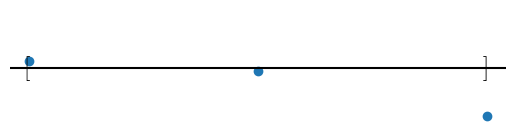

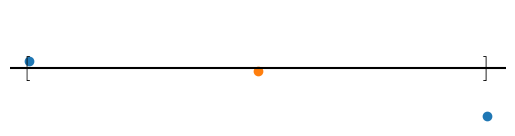

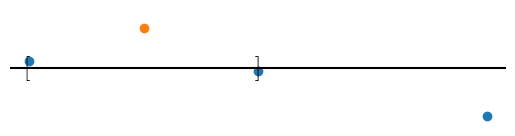

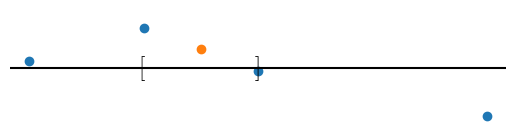

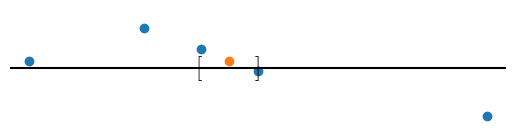

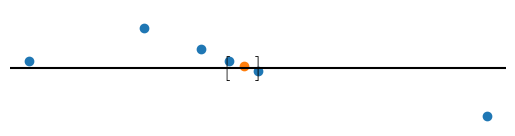

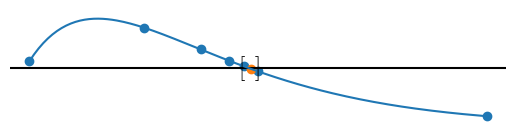

In [33]:
# Compute bisection
root = bisection(f,a,b,tol)
print(root)

## Trapezoidal rule

### Construct pathological function

#### Function to compute integral and variation

In [34]:
def int_var(f,fpp = None, xvec = None, tol = 1e-14):
    if np.any(xvec):
        a = xvec[0]
        b = xvec[1]
    else:
        a = 0
        b = 1
    intf, intferr = sp.integrate.quad(f, a, b, epsabs=tol)
    if fpp:
        varfp, varfperr = sp.integrate.quad(lambda x : np.abs(fpp(x)), a, b, epsabs=tol)
        if np.any(xvec):
            n = xvec.size-1
            varfpvec = np.zeros(n)
            for ii in range(xvec.size-1):
                varfpvec[ii],_ = sp.integrate.quad(lambda x : np.abs(fpp(x)), xvec[ii], xvec[ii+1], epsabs=tol)
        else:
            varfpvec = None
    else:
        varfp = None
        varfperr = None
        varfpvec = None
    return intf, varfp, varfpvec, intferr, varfperr

#### A one hump function 

In [35]:
#Use symbolic computation to get function and its second derivative
xx = sy.symbols('xx')
ff = 3*sy.exp(-10*(xx-1/2)**2)  #one hump
f = sy.lambdify(xx, ff, modules=["numpy"])
intf, intferr = sp.integrate.quad(f, 0, 1, epsabs=1e-15)
ffpp = sy.diff(ff,xx,2)
fpp = sy.lambdify(xx, ffpp, modules=["numpy"])
intf, varfp, _,_,_ = int_var(f,fpp)
print(f"Integral of f = {intf}\nVariation of f' = {varfp}")

Integral of f = 1.638875915355444
Variation of f' = 27.624750931916207


#### Wavy function

In [36]:
#Use symbolic computation to get wavy function and its second derivative
ncoarse = 6
ffwave = 1 - sy.cos(2* sy.pi*ncoarse*xx)  #function that is zero at xx_i = i/ncoarse
fwave = sy.lambdify(xx, ffwave, modules=["numpy"])
ffwavepp = sy.diff(ffwave,xx,2)
fwavepp = sy.lambdify(xx, ffwavepp, modules=["numpy"])
intfwave, _, _,_,_ = int_var(fwave) #cubature has problems with integrating the absolute value of a wavy function
_, varfwavep, _,_,_ = int_var(fwave,fwavepp,np.array([0,1/(4*ncoarse)]))  #so we take advantage of its periodicity
varfwavep = 4 * ncoarse * varfwavep
print(f"Integral of fwave = {intfwave}\nVariation of fwave' = {varfwavep}")

Integral of fwave = 1.0
Variation of fwave' = 904.7786842338604


In [37]:
xcoarse = np.linspace(0,1,ncoarse+1)
nfine = 2*ncoarse
xfine = np.linspace(0,1,nfine+1)

def trapquick(x,fx):  #quick trapezoidal rule
    heights = (fx[:-1]+fx[1:])/2
    widths = np.diff(x)
    T = np.sum(heights*widths)
    return T

Tfcoarse = trapquick(xcoarse,f(xcoarse))
Tffine = trapquick(xfine,f(xfine))
print(f"Trapezoidal rule for f on the coarse grid = {Tfcoarse} and on the fine grid = {Tffine}")

Tfwavecoarse = trapquick(xcoarse,fwave(xcoarse))
Tfwavefine = trapquick(xfine,fwave(xfine))
print(f"Trapezoidal rule for fwave on the coarse grid = {Tfwavecoarse} and on the fine grid = {Tfwavefine}")

alpha = (Tfwavefine - Tfwavecoarse)*(Tfcoarse - Tffine)  #used to make a function that has the same value of the trapezoidal rule on coarse and fine grids
fcombo = lambda x : f(x) + alpha*fwave(x)  #the pathological function
fcombopp = lambda x : fpp(x) + alpha*fwavepp(x)
intfcombo, varfcombop, _,_,_ = int_var(fcombo,fcombopp)
print(f"Integral of fcombo = {intfcombo}\nVariation of fcombo' = {varfcombop}")

Tfcombocoarse = trapquick(xcoarse,fcombo(xcoarse))
Tfcombofine = trapquick(xfine,fcombo(xfine))
Errfcombocoarse = np.abs(intfcombo - Tfcombocoarse)
Errfcombofine = np.abs(intfcombo - Tfcombofine)
print(f"Trapezoidal rule for fcombo on the coarse grid = {Tfcombocoarse} and on the fine grid = {Tfcombofine}")
print(f"Error of trapezoidal rule for fcombo on the coarse grid = {Errfcombocoarse} and on the fine grid = {Errfcombofine}")

Trapezoidal rule for f on the coarse grid = 1.6277006155168212 and on the fine grid = 1.6360391566677264
Trapezoidal rule for fwave on the coarse grid = 0.0 and on the fine grid = 1.0
Integral of fcombo = 1.630537374204539
Variation of fcombo' = 28.793867681040886
Trapezoidal rule for fcombo on the coarse grid = 1.6277006155168212 and on the fine grid = 1.6277006155168214
Error of trapezoidal rule for fcombo on the coarse grid = 0.002836758687717822 and on the fine grid = 0.0028367586877176


### Plot of trapezoidal rule

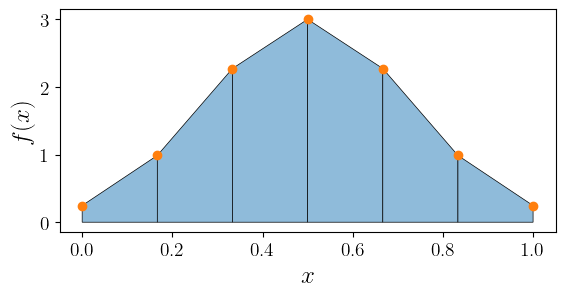

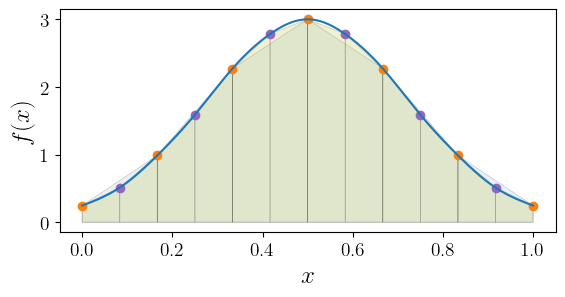

In [38]:
n = ncoarse #number of trapezoids
x =  np.linspace(0,1,n+1)
fx = fcombo(x)
fig, ax = plt.subplots(subplot_kw={'aspect': 0.15})
for ii in range(n):
    trapezoid = patches.Polygon([[x[ii],0],[x[ii],fx[ii]], [x[ii+1],fx[ii+1]], [x[ii+1],0]], \
                                closed = True, linewidth=0.5, edgecolor='k', facecolor=lighter_py_blue)
    ax.add_patch(trapezoid)
ax.scatter(x,fx,color = py_orange)
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")

fig.savefig(figpath+f"trapezoidal_rule_n_{n}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

#plot coarse and fine versions
fig, ax = plt.subplots(subplot_kw={'aspect': 0.15})
for ii in range(n):
    trapezoid = patches.Polygon([[x[ii],0],[x[ii],fx[ii]], [x[ii+1],fx[ii+1]], [x[ii+1],0]], \
                                closed = True, linewidth=0.5, edgecolor='k', facecolor=lighter_py_blue, alpha = 0.2)
    ax.add_patch(trapezoid)

xfine =  np.linspace(0,1,2*n+1)
fxfine = fcombo(xfine)
for ii in range(2*n):
    trapezoid = patches.Polygon([[xfine[ii],0],[xfine[ii],fxfine[ii]], [xfine[ii+1],fxfine[ii+1]], [xfine[ii+1],0]], \
                                closed = True, linewidth=0.5, edgecolor='k', facecolor=py_yellow, alpha = 0.2)
    ax.add_patch(trapezoid)

ax.scatter(x,fx,color = py_orange)
ax.scatter(xfine[1:-1:2],fxfine[1:-1:2],color = py_purple)

ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")

fig.savefig(figpath+f"trapezoidal_rule_n_{2*n}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

#Add plot of function
xplot = np.linspace(0,1,501)
fplot = fcombo(xplot)
ax.plot(xplot,fplot,color = py_blue)
fig.savefig(figpath+f"function_trapezoidal_rule_n_{2*n}."+imgfrmt,format=imgfrmt,bbox_inches='tight')


### Adaptive sample size

In [39]:
nmin = 5
fdg_0 = 2
err_tol = 1e-2

def fudge(h,nmin = 10,fdg_0 = 2):
    if np.any(1 - h*nmin == 0):
        print(nmin,h)
    return fdg_0/(1 - h*nmin)

def varfpest(fvec,xvec):
    if np.array([xvec]).size == 1: #equally spaced
        varfp = np.sum(np.abs(np.diff(fvec,n=2))/xvec)
    else:
        varfp = np.sum(np.abs(np.diff(np.diff(fvec,n=1)/xvec,n=1)))
    return varfp
    

def trapadaptn(f,tol = 1e-3, nmin = 10, fdg_0 = 2):
    n = 2*nmin
    x = np.linspace(0,1,n+1)
    fx = f(x)
    fdd = np.diff(fx,n=2)
    fppappx = fudge(1/n,nmin = nmin, fdg_0 = fdg_0)*sum(fdd)*(n**2/(n-1))
    errbd = np.abs(fppappx/(8*n**2))
    while errbd > tol:
        xadd = x[:-1]+(x[1]-x[0])/2
        fadd = f(xadd)
        new = np.empty((2*n+1,), dtype = x.dtype)
        new[0::2] = x
        new[1:-1:2] = xadd
        x = new
        #print("x=",x)
        fnew = np.empty((2*n+1,), dtype = x.dtype)
        fnew[0::2] = fx
        fnew[1:-1:2] = fadd
        #print("x=",x)
        fx = fnew
        #print("fx=",fx)
        n = 2*n
        fppappx = fudge(1/n,nmin = nmin, fdg_0 = fdg_0)*varfpest(fx,1/n)
        errbd = np.abs(fppappx/(8*n**2))
        #print(f"n = {n} gives an error bound of {errbd:0.2e}")
        #print("err=",errbd)
    #print("x=",x)
    #print("fx=",fx)
    #print(f(x))
    T = (fx[0]+ 2*np.sum(fx[1:-1]) + fx[-1])/(2*n)
    return T, n, errbd, x, fx


#### Run the adaptive sample size algorithm

In [40]:
T, n, errbd, x, fx = trapadaptn(fcombo,tol = err_tol, nmin = 10, fdg_0 = 2)
print(f'T_{n} = {T}, with an errorbound of {errbd:0.5f},\n which is less than the error tolerance of {err_tol:0.5f},\n and should be no less than the true error of {np.abs(intfcombo-T):0.5f}')

T_20 = 1.6295130320301543, with an errorbound of 0.00731,
 which is less than the error tolerance of 0.01000,
 and should be no less than the true error of 0.00102


#### Plot the adaptive sample size algorithm

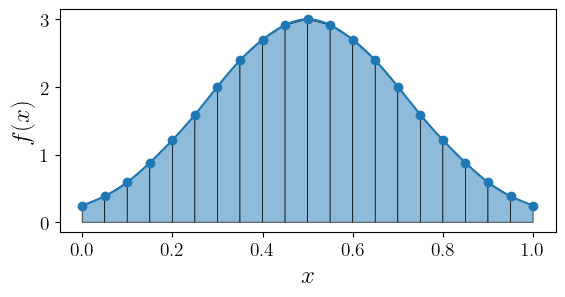

In [41]:
def plot_trap(x,fx,f,line_width = 0.5, edge_color = 'k'):
    fig, ax = plt.subplots(subplot_kw={'aspect': 0.15})
    #plot the adaptive sample size algorithm
    for ii in range(x.size-1):
        trapezoid = patches.Polygon([[x[ii],0],[x[ii],fx[ii]], [x[ii+1],fx[ii+1]], [x[ii+1],0]], \
                                    closed = True, linewidth=line_width, edgecolor=edge_color, facecolor=lighter_py_blue)
        ax.add_patch(trapezoid)
    
    ax.scatter(x,fx,color = py_blue)
    xplot = np.linspace(0,1,501)
    fplot = f(xplot)
    ax.plot(xplot,fplot,color = py_blue)
    
    ax.set_xlabel("$x$")
    ax.set_ylabel("$f(x)$")
    
plot_trap(x,fx,fcombo)
fig.savefig(figpath+f"adapt_n_trapezoidal_rule_n_{n}."+imgfrmt,format=imgfrmt,bbox_inches='tight')



#### Checking whether our functions are in the cone

In [42]:
nmin = 3
fdg_0 = 2
def check_in_cone(f,varfp,nmin,fdg_0, nn = 14):
    nvec = nmin+1 + np.arange(nn)
    inout = np.full_like(nvec, fill_value="in", dtype="U3")
    varuppbd = np.inf
    for ii,n in enumerate(nvec):
        x = np.linspace(0,1,n+1)
        fx = f(x)    
        varuppbd_n = fudge(1/n,nmin = nmin, fdg_0 = fdg_0)*varfpest(fx,1/n)
        #print(varuppbd_n)
        if varuppbd_n < varfp:
            inout[ii] = "out"
        varuppbd = np.min([varuppbd, varuppbd_n])
    return varuppbd, varuppbd > varfp, inout

fcomboout = check_in_cone(fcombo,varfcombop,nmin,fdg_0)
print(varfcombop,fcomboout[:2])
fout = check_in_cone(f,varfp,nmin,fdg_0)
print(varfp,fout[:2])
fwaveout = check_in_cone(fwave,varfwavep,nmin,fdg_0)
print(varfwavep,fwaveout[:2])


28.793867681040886 (65.75447942421125, True)
27.624750931916207 (63.37035723648412, True)
904.7786842338604 (0.0, False)


### Adaptive node selection

In [43]:
def errbd_interval(fvec,xvec,fudge,nmin,fdg_0):
    diff_x = np.diff(xvec,n=1)
    fpappx = np.diff(fvec,n=1)/diff_x #first order divided differences, derivatives somewhere 
    dfpappx = np.diff(fpappx)  #difference of the derivatives
    diff_2x = xvec[2:] - xvec[0:-2] #widths of two adjacent intervals
    varfpbd = np.array([fudge(diff_2x[0],nmin,fdg_0)*np.abs(dfpappx[0]), \
                        *np.max([fudge(diff_2x[:-1],nmin,fdg_0)*np.abs(dfpappx[:-1]), fudge(diff_2x[1:],nmin,fdg_0)*np.abs(dfpappx[1:])],axis = 0, keepdims = False), \
                        fudge(diff_2x[-1],nmin,fdg_0)*np.abs(dfpappx[-1])])  
    errbdinterval = varfpbd * (diff_x**2)/8  #error bound on each interval
    errbd = sum(errbdinterval)  #total error bound
    return errbd, errbdinterval, varfpbd

In [44]:
def trapadaptx(f,tol = 1e-3, nmin = 10, fdg_0 = 2):
    n = 3*nmin
    x = np.linspace(0,1,n+1)
    #print(f"x ={x}")
    fx = f(x)
    errbd, errbdvec, _ = errbd_interval(fx,x,fudge,nmin,fdg_0)
    while errbd > tol:
        which_split = np.argmax(errbdvec)
        xadd = (x[which_split]+x[which_split+1])/2
        #print("xadd = ", xadd)
        fadd = f(xadd)
        x = np.insert(x,which_split+1,xadd)
        fx = np.insert(fx,which_split+1,fadd)
        n = n + 1
        errbd, errbdvec, _ = errbd_interval(fx,x,fudge,nmin,fdg_0)
        #print("err=",err)
    #print("x=",x)
    #print("fx=",fx)
    #print(np.diff(x))
    #print(f(x))
    T = np.sum(((fx[:-1]+fx[1:])/2)*np.diff(x))
    return T, n, errbd, x, fx

The adaptive sample size trapezoidal rule gives
     T_20 = 1.6295130320301543, with an errorbound of 0.00731,
     which is less than the error tolerance of 0.01000,
     and should be no less than the true error of 0.00102
The adaptive node placement trapezoidal rule gives
     T_44 = 1.630661737814253, with an errorbound of 0.00981,
     which is less than the error tolerance of 0.01000,
     and should be no less than the true error of 0.00012


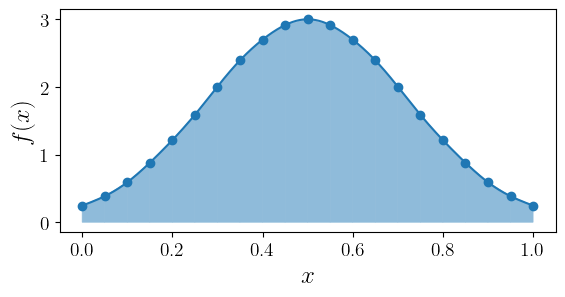

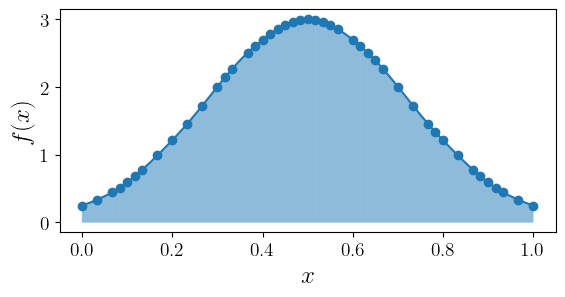

In [45]:
T, n, errbd, x, fx = trapadaptn(fcombo,tol = err_tol, nmin = 10, fdg_0 = 2)
print(f'The adaptive sample size trapezoidal rule gives\n \
    T_{n} = {T}, with an errorbound of {errbd:0.5f},\n \
    which is less than the error tolerance of {err_tol:0.5f},\n \
    and should be no less than the true error of {np.abs(intfcombo-T):0.5f}')
plot_trap(x,fx,fcombo,edge_color = lighter_py_blue)
fig.savefig(figpath+f"fcombo_adapt_n_trapezoidal_rule_n_{n}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

T, n, errbd, x, fx = trapadaptx(fcombo,tol = err_tol, nmin = 10, fdg_0 = 2)
print(f'The adaptive node placement trapezoidal rule gives\n \
    T_{n} = {T}, with an errorbound of {errbd:0.5f},\n \
    which is less than the error tolerance of {err_tol:0.5f},\n \
    and should be no less than the true error of {np.abs(intfcombo-T):0.5f}')
plot_trap(x,fx,fcombo,edge_color = lighter_py_blue)
fig.savefig(figpath+f"fcombo_adapt_x_trapezoidal_rule_n_{n}."+imgfrmt,format=imgfrmt,bbox_inches='tight')


#### Find a function where adaptive node selection makes a difference

In [46]:
#Use symbolic computation to get function and its second derivative
xx = sy.symbols('xx')
ffpeak = 4*sy.exp(-100*(xx-0.2)**2)  #one hump
fpeak = sy.lambdify(xx, ffpeak, modules=["numpy"])
ffpeakpp = sy.diff(ffpeak,xx,2)
fpeakpp = sy.lambdify(xx, ffpeakpp, modules=["numpy"])
intfpeak, varfpeakp, _,_,_ = int_var(fpeak,fpeakpp)
print(f"Integral of f = {intfpeak}\nVariation of f' = {varfpeakp}")

Integral of f = 0.7073233264860719
Variation of f' = 134.31171936060167


The adaptive sample size trapezoidal rule gives
     T_160 = 0.7073137933015878, with an errorbound of 0.00139,
     which is less than the error tolerance of 0.00500,
     and should be no less than the true error of 0.00001
The adaptive node placement trapezoidal rule gives
     T_61 = 0.707533769768953, with an errorbound of 0.00484,
     which is less than the error tolerance of 0.00500,
     and should be no less than the true error of 0.00021


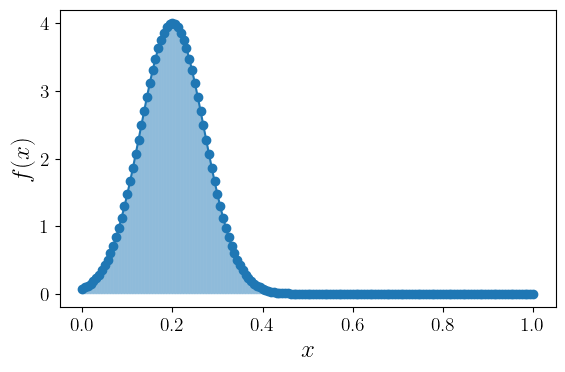

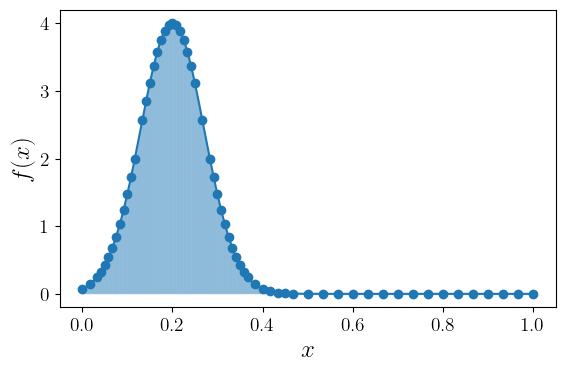

In [47]:
err_tol = 5e-3
T, n, errbd, x, fx = trapadaptn(fpeak,tol = err_tol, nmin = 10, fdg_0 = 2)
print(f'The adaptive sample size trapezoidal rule gives\n \
    T_{n} = {T}, with an errorbound of {errbd:0.5f},\n \
    which is less than the error tolerance of {err_tol:0.5f},\n \
    and should be no less than the true error of {np.abs(intfpeak-T):0.5f}')

plot_trap(x,fx,fpeak,edge_color = lighter_py_blue)
fig.savefig(figpath+f"fpeak_adapt_n_trapezoidal_rule_n_{n}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

T, n, errbd, x, fx = trapadaptx(fpeak,tol = err_tol, nmin = 10, fdg_0 = 2)
print(f'The adaptive node placement trapezoidal rule gives\n \
    T_{n} = {T}, with an errorbound of {errbd:0.5f},\n \
    which is less than the error tolerance of {err_tol:0.5f},\n \
    and should be no less than the true error of {np.abs(intfpeak-T):0.5f}')
plot_trap(x,fx,fpeak,edge_color = lighter_py_blue)
fig.savefig(figpath+f"fpeak_adapt_x_trapezoidal_rule_n_{n}."+imgfrmt,format=imgfrmt,bbox_inches='tight')


# BREAK HERE

In [48]:
sys.exit("Stopping execution")

SystemExit: Stopping execution

/Users/fredhickernell/miniconda3/envs/qmcpy/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3558


### Plot the errors of the three methods

In [ ]:
#Load the output for plotting
out_filename = f'Keister_d_{d}_n_max_{n_max}_n_rep_{n_rep}.pkl'
with open(figpath+out_filename,'rb') as myfile: 
    d,m_max,n_rep,n_max,n_grid,n_mc,n_qmc,err_grid,err_mc,err_qmc,err_mc_avg,err_qmc_avg = pickle.load(myfile) #load in all the data


#Plot the errors and trend lines
keister_plt_lines_args = {"linewidth" : 3,
                         "markersize" : 10}
plt.loglog(n_grid, err_grid, **blue_symbol, alpha = 1, label = "grid") #grid sampling errors
plt.loglog([n_grid[0],n_grid[-1]],[err_grid[0],err_grid[0]*(n_grid[-1]/n_grid[0])**(-1./(d-1))], ':', \
           **keister_plt_lines_args, color = py_blue, label = "$\mathcal{O}(n^{-1/5})$") #trend of grid errors
al_scat = 1/np.sqrt(n_rep) #opacity of symbols
plt.loglog(n_mc, err_mc[:,0], **orange_symbol, alpha = al_scat, label = "IID")  #Monte Carlo errors
plt.loglog(n_mc, err_mc[:,1:], **orange_symbol, alpha = al_scat)  #Monte Carlo errors
plt.loglog(n_mc, err_mc_avg, '--', **keister_plt_lines_args, color = py_orange, label = "IID avg") #average of MC errors
#plt.loglog([n_mc[0],n_mc[-1]],[err_qmc_avg[0],err_qmc_avg[0]*(n_mc[-1]/n_mc[0])**(-1./2)], \
#           '-', **keister_plt_lines_args, color = py_orange, label = "$\mathcal{O}(n^{-1/2})$")
plt.loglog(n_qmc, err_qmc[:,0], **green_symbol, alpha = al_scat, label = "LD") #quasi-Monte Carlo errors
plt.loglog(n_qmc, err_qmc[:,1:], **green_symbol, alpha = al_scat) #quasi-Monte Carlo errors
plt.loglog(n_qmc, err_qmc_avg, '-.', **keister_plt_lines_args, color = py_green, label = "LD avg")  #average of quasi-Monte Carlo errors
plt.loglog([n_qmc[0],n_qmc[-1]],[err_qmc_avg[0],err_qmc_avg[0]*(n_mc[-1]/n_mc[0])**(-1.)], \
           '-', **keister_plt_lines_args, color = py_green, label = "$\mathcal{O}(n^{-1})$")  #trend of qMC errors
plt.xlabel("Sample Size, $n$")
plt.ylabel("Relative Error, $|(\mu - \hat{\mu}_n)/\mu |$")
plt.grid(False)
legend = plt.legend(loc = "lower left", handlelength=5, frameon=False)
for legend_handle in legend.legendHandles:
    legend_handle.set_alpha(1)  # Set legend symbol opacity
#plt.show()

if savefigs:
    plt.savefig(figpath+f"n_is_{n_max}_d_is_{d}_n_rep_is_{n_rep}_KeisterErrors."+imgfrmt,format=imgfrmt,bbox_inches='tight')

## ise

## Examples of ways to spread points on a hypercube

### Evenly spaced points in one dimension $(d=1)$
In one dimension it is easy to spread points evenly

In [ ]:
n = 64
xpts = np.linspace(1/(2*n), 1-1/(2*n), n) #equally spaced points between 0 and 1
fig, ax = plt.subplots()
ax.plot(xpts, np.zeros_like(xpts), **blue_symbol, zorder=10, clip_on=False) 
ax.set_ylim([0, 3e-2])
ax.set_title(f"{n:.0f} Equally Spaced Points for $d=1$")
ax.set_xlabel("$x_i$")
ax.set_aspect(1)
ax.axes.get_yaxis().set_visible(False)  #turn off the tics on the vertical axis
ax.spines[['top','right','left']].set_visible(False)  #turn off the bounding box on the top and sides
if savefigs:
    fig.savefig(figpath+f"{n:.0f}equallyspacedpts."+imgfrmt,format=imgfrmt)

### Grids in dimension $d$
Our natural thought for higher dimensions is to use rectangular grids, but as the dimension, $d$, increases, the number of different values per coordinate decreases drastically.

In [ ]:
plt.rcParams.update({
    "font.family" : font_family,
    "mathtext.fontset" : "dejavuserif",
    "axes.labelsize" : 18,
    "axes.titlesize" : 18,
    "xtick.labelsize" : 14,
    "ytick.labelsize" : 14
})
def plot_grid(xgrid, coord_to_plot = [0, 1], savefig = True, figpath = ''):
    n = xgrid.shape[0]
    d = xgrid.shape[1]
    coord_to_plot = np.minimum(coord_to_plot,[d,d]), #ensure that they are no more than d
    coord_to_plot = coord_to_plot[0]
    coord_to_plot = np.maximum(coord_to_plot,[1,1]), #ensure that they are no less than 1
    coord_to_plot = coord_to_plot[0]
    fig, ax = plt.subplots(figsize=(4.5,4.5))
    ax.plot(xgrid[:,coord_to_plot[0]-1], xgrid[:,coord_to_plot[1]-1], **blue_symbol, zorder=10, clip_on=False) 
    ax.set_title(f"{n:.0f} Grid Points for $d = ${d:.0f}",fontsize=20)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel(r'$x_{i%d}$'%(coord_to_plot[0]),fontsize=20)#,fontname="dejavuserif",font_familiy="serif")
    ax.set_ylabel(r'$x_{i%d}$'%(coord_to_plot[1]),fontsize=20)#,fontname="dejavuserif")
    ax.set_aspect(1)
    ax.grid(False)
    if savefigs:
        fig.savefig(figpath+f"{n:.0f}gridpts_d{d:.0f}."+imgfrmt,format=imgfrmt, bbox_inches='tight')


In [ ]:
plot_grid(make_grid(2,8), [1,2], savefigs, figpath)
plot_grid(make_grid(3,4), [1,2], savefigs, figpath)
plot_grid(make_grid(6,2), [1,2], savefigs, figpath)

### Independent and identically distributed (IID) points
Since grids are bad, we can use IID points instead.  Note how they fill space better.

In [ ]:
#Parameter values used here and below
d = 6  #the dimension used for these examples
n = 64  #the sample size used for these examples
dot_size = 20  #size of dot in some plots
line_width = 2.5

In [ ]:
plot_proj_args = {"figfac" : 11,
                  "axis_pad" : 0.05,
                  "marker_size" : dot_size,
                  "font_family" : font_family,
                  "want_grid" : False,
                  "where_title" : 0.527}
fig,ax = qp.plot_proj(qp.IIDStdUniform(d), n, d_horizontal = 1, d_vertical = np.arange(2,6), **plot_proj_args, \
                      fig_title = f"{n} Independent and Identically Distributed (IID) points ($d = $ {d})")
if savefigs:
        fig.savefig(figpath+f"{n:.0f}iidpts_d{d:.0f}."+imgfrmt,format=imgfrmt, bbox_inches='tight')

### Low disrepancy points
There are several kinds of low discrepancy points, includng Sobol', lattice, and Halton.  Below we display one kind.

In [ ]:
fig,ax = qp.plot_proj(qp.Sobol(d), n, d_horizontal = 1, d_vertical = np.arange(2,6), **plot_proj_args, \
                      fig_title = f"{n} Low Discrepancy (LD) Points ($d = $ {d})")
    #d_horizontal and d_vertical are the tuples of coordinates to plot
if savefigs:
        fig.savefig(figpath+f"{n:.0f}sobolpts_d{d:.0f}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

### Integration Lattices

#### Constructing an integration lattice
$$
\vx_i = i \vh / n \ \pmod{1}, \qquad i = 0, \ldots, n-1
$$

In [ ]:
h_gen = np.array([1, 11])
n = 16
d = h_gen.size
x_lat = np.mod(np.arange(0,n).reshape(n,1)*h_gen.reshape(1,d)/n,1)
#x_lat = qp.Lattice(d,randomize = False).gen_samples(n)

al_fade = 0.3
x_off = 0.05
an_ft = 15
arrow_style = {"color" : py_green, "head_width" : 0.03, "length_includes_head" : True, "linewidth" : line_width}
n_plt = 4
fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))
for ii in range(n_plt):
    ax[ii].set_xlim([-0.1, 1.2])
    ax[ii].set_ylim([-0.1, 1.5])
    ax[ii].set_aspect(1) 
    ax[ii].grid(False)
    ax[ii].plot([0,0,1,1,0],[0,1,1,0,0], linewidth = 0.5, color = "gray")
    ax[ii].set_xlabel("$x_{i1}$")
    ax[ii].set_ylabel("$x_{i2}$")

    
ax[0].plot(x_lat[0,0],x_lat[0,1], **blue_symbol)
ax[0].plot(x_lat[1,0],x_lat[1,1], **orange_symbol)
ax[0].arrow(x_lat[0,0],x_lat[0,1],h_gen[0]/n,h_gen[1]/n,**arrow_style)
ax[0].annotate(f"$\\boldsymbol{{x}}_1$",(x_lat[1,0]+x_off,x_lat[1,1]))


for jj in range(1,4):  #next three plots
    over_ctr = 0  #how many times higher than one
    ax[jj].plot(x_lat[0,0],x_lat[0,1],**blue_symbol) #plot the origin
    x_next_vert = x_lat[0,1]+h_gen[1]/n  #how high the next point may go
    kk = 1  #next is the first point
    cond = (over_ctr < jj)  or ((jj == 3) & (kk < n))
    #print("jj = ",jj,"kk = ",kk,"cond =",cond)
    while cond :
        while x_next_vert < 1:  #as long as the next point does not go to high
            ax[jj].plot(x_lat[kk,0],x_lat[kk,1],**blue_symbol)  #plot next point
            ax[jj].arrow(x_lat[kk-1,0],x_lat[kk-1,1],h_gen[0]/n,h_gen[1]/n,alpha = al_fade,**arrow_style)  #plot arrow to nexgt point
            x_next_vert = x_lat[kk,1]+h_gen[1]/n  #how high does the next point go
            kk += 1  #increment next point
        over_ctr +=1  #this next point will go over the vertical axis
        #print("over_ctr =",over_ctr)
        cond = (over_ctr < jj)  or ((jj == 3) & (kk < n-1)) #is this the last jump or the last figure
        #print("jj = ",jj,"kk = ",kk,"n =",n,"cond =",cond)
        xcross = x_lat[kk-1,0]+(1.-x_lat[kk-1,1])*h_gen[0]/h_gen[1]  #determine the crosssing point 
        if cond:  #if not over more than allowed number of times 
            ax[jj].plot([x_lat[kk-1,0],xcross],[x_lat[kk-1,1],1],'-',color = py_green, alpha = al_fade, linewidth = line_width)  #plot the bottom part of the arrow
            ax[jj].arrow(xcross,1,x_lat[kk,0]-xcross,x_lat[kk,1],alpha = al_fade,**arrow_style)  #plot the top part of the arrow
            ax[jj].arrow(xcross,0,x_lat[kk,0]-xcross,x_lat[kk,1],alpha = al_fade,**arrow_style)  #plot the top part of the wrapped around arrow
            ax[jj].plot(x_lat[kk,0],x_lat[kk,1],**blue_symbol)  #plot the new point
        else:
            #print("jj = ",jj,"kk = ",kk,"n =",n,"cond =",cond)
            ax[jj].plot([x_lat[kk-1,0],xcross],[x_lat[kk-1,1],1],'-',color = py_green,linewidth = line_width)
            ax[jj].arrow(xcross,1,x_lat[kk,0]-xcross,x_lat[kk,1],alpha = al_fade,**arrow_style)
            ax[jj].arrow(xcross,0,x_lat[kk,0]-xcross,x_lat[kk,1],**arrow_style)
            ax[jj].annotate(f"$\\boldsymbol{{x}}_{{{kk}}}$",(x_lat[kk,0]+x_off,x_lat[kk,1]))
            ax[jj].plot(x_lat[kk,0],x_lat[kk,1],**orange_symbol)  #plot the new point
        ax[jj].plot(x_lat[kk,0],1 + x_lat[kk,1],**blue_symbol, alpha = al_fade)  #plot the new point before wrap around
        x_next_vert = x_lat[kk,1]+h_gen[1]/n
        kk += 1
        cond = (over_ctr < jj)  or ((jj == 3) & (kk < n))
        #print("jj = ",jj,"kk = ",kk,"n =",n,"cond =",cond)

ax[3].plot(1.,1. , **blue_symbol, alpha = al_fade)
ax[3].plot(1.,1. , **blue_symbol, alpha = al_fade)
ax[3].arrow(x_lat[-1,0],x_lat[-1,1],h_gen[0]/n,h_gen[1]/n,alpha = al_fade,**arrow_style)
        
fig.suptitle(f"Lattice $\\boldsymbol{{x}}^{{\mathrm{{lat}}}}_i = i ({h_gen[0]},{h_gen[1]})/{n} \\pmod{{\\boldsymbol{{1}}}}, \\quad i = 0, \\ldots, {n-1}$", \
             ha = 'center', va = 'center', y = .92, fontsize=22)
fig.tight_layout()
if savefigs:
        fig.savefig(figpath+f"{n:.0f}_lattice_construct_d{d:.0f}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

In [ ]:
x_lat = x_lat[:,0:2]
n_plt = 4
fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))
for ii in range(n_plt):
    ax[ii].set_xlim([-0.1, 1.2])
    ax[ii].set_ylim([-0.1, 1.4])
    ax[ii].set_aspect(1) 
    ax[ii].grid(False)
    ax[ii].plot([0,0,1,1,0],[0,1,1,0,0], linewidth = 0.5, color = "gray")
    ax[ii].set_xlabel("$x_{i1}$")
    ax[ii].set_ylabel("$x_{i2}$")

shift = np.array([[1/5,1/3],[3/5,1/5],[2/7,5/7]])
    
ax[0].plot(x_lat[:,0],x_lat[:,1],**blue_symbol)

for ii in range(1,4):
    x_shlat = x_lat + shift[ii-1,:]
    x_shlatmod = np.mod(x_shlat,1)
    ax[ii].plot(x_shlat[:,0],x_shlat[:,1],**blue_symbol)
    ax[ii].plot(x_shlatmod[:,0],x_shlatmod[:,1],**orange_symbol)
    ax[ii].arrow(0,0,x_shlat[0,0],x_shlat[0,1],**arrow_style)
    ax[ii].annotate(f"$\\boldsymbol{{x}}_{{0}} = \\boldsymbol{{\\Delta}}$",(x_shlat[0,0]+x_off,x_shlat[0,1]), fontsize = an_ft)

fig.suptitle(f"Lattice $\\boldsymbol{{x}}_i = i ({h_gen[0]},{h_gen[1]})/{n} + \\boldsymbol{{\\Delta}} \\pmod{{\\boldsymbol{{1}}}}, \\quad i = 0, \\ldots, {n-1}$", \
             ha = 'center', va = 'center', fontsize = 22, y=0.90)
if savefigs:
        fig.savefig(figpath+f"{n:.0f}_shifted_lattice_construct_d{d:.0f}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

#### Constructing a __shifted__ integration lattice
$$
\vx_i = i \vh / n + \boldsymbol{\Delta} \ \pmod{1}, \qquad i = 0, \ldots, n-1
$$

#### van der Corput sequence, an extensible 1-D even sequence

In [ ]:
n = 16
xoff = -0.01
yoff = 0.01
xpts = qp.Sobol(1,randomize =  False).gen_samples(n) #equally spaced points between 0 and 1
fig, ax = plt.subplots()
ax.plot(xpts, np.zeros_like(xpts), zorder=10, clip_on=False, **blue_symbol)
ax.set_ylim([0, 3e-2])
ax.set_title(f"{n:.0f} points of a van der Corput squence")
#ax.set_xlabel("$x_i$")
ax.set_aspect(1)
ax.axes.get_yaxis().set_visible(False)  #turn off the tics on the vertical axis
ax.grid(False)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.spines[['top','right','left']].set_visible(False)  #turn off the bounding box on the top and sides
for ii in range(6):
    ax.annotate(f"$x_{{{ii}}}$",(xpts[ii] + xoff, yoff), fontsize = an_ft)
if savefigs:
    fig.savefig(figpath+f"{n:.0f}vandercorputpts."+imgfrmt,format=imgfrmt)


#### Constructing an __extensible__ integration lattice
$$
\vx_i = i \vh / n \ \pmod{1}, \qquad i = 0, \ldots, n-1
$$

In [ ]:
m = 4
n =  2**m
#h_gen = np.array([1,11])
vdc = qp.Sobol(1,randomize =  False).gen_samples(n) #equally spaced points between 0 and 1
x_lat = np.mod(vdc*h_gen,1)
#print(x_lat)
n_plt = 3
fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))

for ii in range(n_plt):
    jj = ii+m-n_plt
    ax[ii].set_xlim([-0.1, 1.1])
    ax[ii].set_ylim([-0.1, 1.1])
    ax[ii].set_aspect(1) 
    ax[ii].grid(False)
    ax[ii].set_xlabel("$x_{i1}$")
    ax[ii].set_ylabel("$x_{i2}$")
    nstart = 0
    ax[ii].plot(x_lat[0:2**jj,0],x_lat[0:2**jj,1],**blue_symbol)
    ax[ii].plot(x_lat[2**jj:2**(jj+1),0],x_lat[2**jj:2**(jj+1),1],**orange_symbol)

fig.suptitle(f"Lattice $\\boldsymbol{{x}}_i = \\phi_2(i) ({h_gen[0]},{h_gen[1]}) \\pmod{{\\boldsymbol{1}}}, \\quad i = 0, \\ldots, 2^m - 1, \\quad m = 2, 3, 4$", \
             ha = 'center', va = 'center', fontsize = 20, y = 0.92)
if savefigs:
        fig.savefig(figpath+f"{n:.0f}_extensible_lattice_construct_d{d:.0f}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

#### Constructing an __extensible__ and __shifted__ integration lattice
$$
\vx_i = i \vh / n + \boldsymbol{\Delta} \ \pmod{1}, \qquad i = 0, \ldots, n-1
$$

In [ ]:
n =  16
x_lat = qp.Lattice(2, seed = 47).gen_samples(n)
n_plt = 4
fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))

for ii in range(n_plt):
    ax[ii].set_xlim([-0.1, 1.1])
    ax[ii].set_ylim([-0.1, 1.1])
    ax[ii].set_aspect(1) 
    ax[ii].grid(False)
    ax[ii].set_xlabel("$x_{i1}$")
    ax[ii].set_ylabel("$x_{i2}$")
    nstart = 0
    ax[ii].plot(x_lat[0:2**ii,0],x_lat[0:2**ii,1],**blue_symbol)
    ax[ii].plot(x_lat[2**ii:2**(ii+1),0],x_lat[2**ii:2**(ii+1),1],**orange_symbol)

#fig.text(0.55,0.95,f"Lattice $\\boldsymbol{{x}}_i = i ({h_gen[0]},{h_gen[1]})/{n} + \\boldsymbol{{\\Delta}} \\pmod{{1}}, \\quad i = 0, \\ldots, {n-1}$", ha = 'center', va = 'center', fontsize = 20)
if savefigs:
        fig.savefig(figpath+f"{n:.0f}_extensible_shifted_lattice_construct_d{d:.0f}."+imgfrmt,format=imgfrmt)

### Digital sequences

#### Digital sequences cover tiles

In [ ]:
n_plt = 4
n = 2**(n_plt-1)
d = 3
x_sob = qp.Sobol(d, randomize = False).gen_samples(n)
print(x_sob)


coord = np.array([[0,1],[0,2]])
print(coord.shape[0])

for iii in range(coord.shape[0]):
    fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))
    for ii in range(n_plt):
        ax[ii].set_xlim([-0.1, 1.1])
        ax[ii].set_ylim([-0.1, 1.1])
        xticklabels = [0]
        for jj in range(2**ii-1):
            xticklabels.append("")
        xticklabels.append(1)
        ax[ii].set_xticks(np.linspace(0,1,2**ii+1),xticklabels)
        yticklabels = [0]
        for jj in range(2**(n_plt-ii-1)-1):
            yticklabels.append("")
        yticklabels.append(1)
        ax[ii].set_yticks(np.linspace(0,1,2**(n_plt-ii-1)+1),yticklabels)
        ax[ii].set_aspect(1) 
        ax[ii].set_xlabel(f"$x_{{i{coord[iii,0]+1}}}$",fontsize = 22)
        ax[ii].set_ylabel(f"$x_{{i{coord[iii,1]+1}}}$",fontsize = 22)
        #ax[ii].grid(False)
        ax[ii].plot(x_sob[:,coord[iii,0]],x_sob[:,coord[iii,1]],**blue_symbol)
    
    #fig.text(0.55,0.95,f"Sobol $\\boldsymbol{{x}}_i = i ({h_gen[0]},{h_gen[1]})/{n} + \\boldsymbol{{\\Delta}} \\pmod{{1}}, \\quad i = 0, \\ldots, {n-1}$", ha = 'center', va = 'center', fontsize = 20)
    if savefigs:
        fig.savefig(figpath+f"{n:.0f}_sobol_sequence_elementary_intervals_d{d:.0f}_coord_({coord[iii,0]+1},{coord[iii,1]+1})."+imgfrmt,format=imgfrmt)

#### __Randomly Shifted__ digital sequences still cover tiles

In [ ]:
n_plt = 4
d = 2
n = 2**(n_plt-1)
fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))
n_scr = 3
for kk in range(n_scr):
    x_sob = qp.Sobol(d, randomize = "DS").gen_samples(n)  #just a digital shift applied
    for ii in range(n_plt):
        if kk == 0:
            ax[ii].set_xlim([-0.1, 1.1])
            ax[ii].set_ylim([-0.1, 1.1])
            ax[ii].set_xlabel("$x_{i1}$",fontsize=22)
            ax[ii].set_ylabel("$x_{i2}$",fontsize=22)
            xticklabels = [0]
            for jj in range(2**ii-1):
                xticklabels.append("")
            xticklabels.append(1)
            ax[ii].set_xticks(np.linspace(0,1,2**ii+1),xticklabels)
            yticklabels = [0]
            for jj in range(2**(n_plt-ii-1)-1):
                yticklabels.append("")
            yticklabels.append(1)
            ax[ii].set_yticks(np.linspace(0,1,2**(n_plt-ii-1)+1),yticklabels)
            ax[ii].set_aspect(1) 
            #ax[ii].grid(False)
        ax[ii].plot(x_sob[:,0],x_sob[:,1],**symbol_args[kk])

fig.suptitle(f"{n_scr} digital shifts of a digital net with {n} points", ha = 'center', va = 'center', fontsize = 20, y=0.83)
if savefigs:
        fig.savefig(figpath+f"n_{n:}_n_sh_{n_scr}_shifted_sobol_sequence_d{d}."+imgfrmt,format=imgfrmt)

#### __Randomly Scrambled__ digital sequences still cover tiles

In [ ]:
fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))
n_scr = 3
for kk in range(n_scr):
    x_sob = qp.Sobol(d).gen_samples(n)
    for ii in range(n_plt):
        if kk == 0:
            ax[ii].set_xlim([-0.1, 1.1])
            ax[ii].set_ylim([-0.1, 1.1])
            ax[ii].set_xlabel("$x_{i1}$",fontsize=22)
            ax[ii].set_ylabel("$x_{i2}$",fontsize=22)
            xticklabels = [0]
            for jj in range(2**ii-1):
                xticklabels.append("")
            xticklabels.append(1)
            ax[ii].set_xticks(np.linspace(0,1,2**ii+1),xticklabels)
            yticklabels = [0]
            for jj in range(2**(n_plt-ii-1)-1):
                yticklabels.append("")
            yticklabels.append(1)
            ax[ii].set_yticks(np.linspace(0,1,2**(n_plt-ii-1)+1),yticklabels)
            ax[ii].set_aspect(1) 
            #ax[ii].grid(False)
        ax[ii].plot(x_sob[:,0],x_sob[:,1],**symbol_args[kk])

fig.suptitle(f"{n_scr} scrambles of a digital net with {n} points", ha = 'center', va = 'center', fontsize = 20, y = 0.83)
if savefigs:
        fig.savefig(figpath+f"n_{n:}_n_scr_{n_scr}_scrambled_sobol_sequence_d{d}."+imgfrmt,format=imgfrmt)

#### Digital nets are extensbile

In [ ]:
d = 2
n_list = np.array([16, 32, 64, 128, 256])
n_plt = len(n_list)-1
x_sob = qp.Sobol(2, seed = 29).gen_samples(n_list[-1])
               
fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))
n_scr = 3
for ii, nn in enumerate(n_list[:n_plt]):
    ax[ii].set_xlim([-0.1, 1.1])
    ax[ii].set_ylim([-0.1, 1.1])
    ax[ii].plot(x_sob[:n_list[ii],0],x_sob[:n_list[ii],1], **blue_symbol)
    ax[ii].plot(x_sob[n_list[ii]:n_list[ii+1],0],x_sob[n_list[ii]:n_list[ii+1],1], **orange_symbol)
    ax[ii].set_aspect(1) 
    ax[ii].grid(False)
    ax[ii].set_xlabel("$x_{i1}$",fontsize=22)
    ax[ii].set_ylabel("$x_{i2}$",fontsize=22)


fig.suptitle(f"Digital nets are extensible as sequences", ha = 'center', va = 'center', fontsize = 20, y = 0.83)
if savefigs:
        fig.savefig(figpath+f"extensible_scrambled_sobol_sequence_d{d:.0f}."+imgfrmt,format=imgfrmt)

### Halton sequences

In [ ]:
n = 64
d = 6
fig,ax = qp.plot_proj(qp.Halton(d, randomize = False), n, d_horizontal = 1, d_vertical = np.arange(2,6), \
                      **plot_proj_args, fig_title = f"{n} Halton (LD) Points ($d = $ {d})")
    #d_horizontal and d_vertical are the tuples of coordinates to plot
if savefigs:
        fig.savefig(figpath+f"{n:.0f}Halton_pts_d{d:.0f}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

## Discrepancy

### Plot kernel

In [ ]:
gram_fun = lambda x, y, weights : (1 + (0.5*weights)*(abs(x - .5) + abs(y - .5) - abs(x - y))).prod(axis=2)
n = 500
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
xmesh,ymesh = np.meshgrid(x,y)
kernel_val = gram_fun(x.reshape(n,1,1),y.reshape(1,n,1),1)
fig, ax = plt.subplots()
kernel_contour = ax.contourf(xmesh,ymesh,kernel_val,cmap = 'viridis', vmin=1, vmax=1.5, levels = 10)
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
ax.invert_yaxis(); ax.xaxis.set_label_position('top');  ax.xaxis.tick_top()
fig.suptitle("$K(t,x)$ for the Centered Discrepancy", y=0.95)
cbar = plt.colorbar(kernel_contour)

if savefigs:
        fig.savefig(figpath+f"centered_discrepancy_kernel."+imgfrmt,format=imgfrmt)

### Compute the discrepancy

#### Function to compute the discrepancy

In [ ]:
def discrep(x, weights = 1, disc_kind = "C", domain = np.array([0,1]), measure_time = False, mem_limit = 2**25, IID_Flag = False):
    '''
        x = n x d numpy array of points that you want to evaluate the discrepancy of
        weighs = coordinate weights
        disc_kind = flavor of discrepancy, default is centered
        domain = domain on which the discrepancy is defined
        mem_limit = number of floating point numbers that can be easily handled in memory to avoid for loops
        IID_Flag = True if you want to compute the root mean squared discrepancy of IID points
    '''
    
    if measure_time:
        start_time = time.time()
    if x.ndim == 1:  #ensure that x is a two dimensional array, get n and d
        x = x.reshape(x.size,1)
        d = 1
        n = x.size
    else:
        n, d = x.shape

    #print("n =", n, "d = ", d)
    
    weights = np.array(weights).reshape(-1)  #turn the weights into a one-dimensional array
    if len(weights) >= d:  #use the first d weights
        weights = weights[:d]
    else:  #or just propagate the first one
        weights = weights[0] * np.ones(d)

    if disc_kind.lower().startswith("c"):
        dbl_integ_fun = lambda weights : (1 + (weights/12)).prod()
        sngl_integ_fun = lambda x, weights : (1 + (0.5*weights)*(abs(x - .5)*(1 - abs(x -.5)))).prod(axis=1)
        gram_fun = lambda x, y, weights : (1 + (0.5*weights)*(abs(x - .5) + abs(y - .5) - abs(x - y))).prod(axis=2)
        diag_integ_fun = lambda weights : (1 + (weights/4)).prod()
 
    if IID_Flag:  #root mean square discrepancy of IID points
        out = np.sqrt((diag_integ_fun(weights) - dbl_integ_fun(weights))/n)
    else:  #discrepancy of actual points input
        #compute the double integral
        dbl_integ = dbl_integ_fun(weights)

        #compute the sum of the single integral and the double sum
        sngl_integ_sum = 0
        dbl_sum = 0
        if x[0,0] != None:  #the discrepancy of some points
            len_chunk = np.floor(np.sqrt(mem_limit/d)).astype('int')
            n_chunk = np.ceil(n/len_chunk).astype('int')
            for ii in range(n_chunk):
                n_ii_start = ii*len_chunk
                n_ii_end = np.array([n,(ii+1)*len_chunk]).min()
                n_ii_batch = n_ii_end - n_ii_start
                if n_ii_batch > 0:
                    x_chunk = x[n_ii_start:n_ii_end,:]
                    sngl_integ_sum  += sngl_integ_fun(x_chunk,weights).sum(axis = 0)
                    x_chunk = x_chunk.reshape(n_ii_batch,1,d)
                    y_chunk = x_chunk.reshape(1,n_ii_batch,d)
                    dbl_sum += gram_fun(x_chunk,y_chunk,weights).sum()
                    for jj in range(ii+1,n_chunk):
                        n_jj_start = jj*len_chunk
                        n_jj_end = np.array([n,(jj+1)*len_chunk]).min()
                        n_jj_batch = n_jj_end - n_jj_start
                        if n_jj_batch > 0:
                            y_chunk = x[n_jj_start:n_jj_end,:].reshape(1,n_jj_batch,d)
                            dbl_sum += 2*gram_fun(x_chunk,y_chunk,weights).sum()
            sngl_integ_sum  *= (2/n)
            dbl_sum *= (1/(n**2)) 
        # print(dbl_integ,sngl_integ_sum,dbl_sum)
        out = np.sqrt(dbl_integ -  sngl_integ_sum + dbl_sum)

    if measure_time:  #if we are measuring time
        total_time = time.time() - start_time
        out = [out, total_time]
    return out

In [ ]:
# Comparing Claude's and Fred's discrepancy functions for accuracy and compute time
n = 2**14  #number of points
d = 20  #dimension
mem_size = 2**12
xpts = qp.Sobol(d, seed = 29).gen_samples(n)
discClaude, timeClaude = qp.discrepancy2(xpts, "c",limiter = mem_size,Time = True)
discFred, timeFred = discrep(xpts,mem_limit = mem_size,measure_time = True)
print("discrepancy[Claude,Fred] =",discClaude,discFred,"time[Claude,Fred] =", timeClaude, timeFred)

#### Discrepancy experiment

In [ ]:
n_vec = 2**np.arange(14)
d_vec = [1, 2, 3, 4, 8, 16, 64]
n_max = np.max(n_vec)
d_max = np.max(d_vec)
xpts = qp.Sobol(d_max, seed = 29).gen_samples(n_max)
x_null = np.array([[None for ii in range(d_max)]])
un_disc = np.zeros((len(n_vec),len(d_vec)))
wt_disc = np.zeros((len(n_vec),len(d_vec)))
iid_un_disc = np.zeros((len(n_vec),len(d_vec)))
iid_wt_disc = np.zeros((len(n_vec),len(d_vec)))
wts = (np.arange(d_max)+1.)**-2.
null_un_disc = np.zeros(len(d_vec))
null_wt_disc = np.zeros(len(d_vec))
for ii, d in enumerate(d_vec):
    null_un_disc[ii] = discrep(x_null[:,:d], 1, 'centered')
    null_wt_disc[ii] = discrep(x_null[:,:d], wts, 'centered')
    for jj, n in enumerate(n_vec):
        if (jj == 0) or (n == n_max):
            print("Starting d =",d,", n=",n)
        un_disc[jj,ii] = discrep(xpts[:n,:d],1, 'centered')
        wt_disc[jj,ii] = discrep(xpts[:n,:d], wts, 'centered')
        iid_un_disc[jj,ii] = discrep(xpts[:n,:d], 1, 'centered', IID_Flag = True)
        iid_wt_disc[jj,ii] = discrep(xpts[:n,:d], wts, 'centered', IID_Flag = True)

out_filename = f'CtrDisc_dmax_{d_max}_nmax_{n_max}.pkl'
stored_vars  = [un_disc,wt_disc,iid_un_disc,iid_wt_disc,null_un_disc,null_wt_disc,d_vec,n_vec]
with open(figpath+out_filename,'wb') as myfile: 
    pickle.dump(stored_vars,myfile)  #save numerical output as a pickle file
print("Finished")

### Plot discrepancy

#### Input data for plotting

In [ ]:
n_max = 2**13
d_max = 64
out_filename = f'CtrDisc_dmax_{d_max}_nmax_{n_max}.pkl'
with open(figpath+out_filename,'rb') as myfile: 
    un_disc,wt_disc,iid_un_disc,iid_wt_disc,null_un_disc,null_wt_disc,d_vec,n_vec = pickle.load(myfile) #load in all the data

#### Draw the plots

In [ ]:
sc_un_disc = un_disc/null_un_disc
sc_iid_un_disc = iid_un_disc/null_un_disc

which_dim=[[0, 1, 2, 3, 4], range(len(d_vec))]
for iii, d_list in enumerate(which_dim):
    d_last = d_vec[d_list[-1]]

    #plot raw discrepancy
    fig, ax = plt.subplots(figsize=(7,5))
    for ii, wh_d in enumerate(d_list):
        d = d_vec[wh_d]
        ax.loglog(n_vec,un_disc[:,wh_d], label = f"$d = {{{d}}}$", **symbol_args[ii])
    ax.loglog(n_vec[[0,-1]], un_disc[0,0]*np.array([1., n_vec[0]/n_vec[-1]]),'-', color = py_blue, label = f"$\\mathcal{{O}}(n^{{-1}})$")
    ax.loglog(n_vec[[0,-1]], un_disc[0,d_list[-1]]*np.array([1., np.sqrt(n_vec[0]/n_vec[-1])]),'-', color = color_cycle[d_list[-1]], label = f"$\\mathcal{{O}}(n^{{-1/2}})$")
    ax.set_xlabel(f"${{n}}$",fontsize=20)
    ax.set_ylabel(f"Centered Discrepancy of Sobol' Nodes",fontsize=14)
    ax.set_ylim([1e-5,1e4])
    ax.legend(loc='upper right', ncol = 3, frameon = False)
    ax.grid(False)
    plt.subplots_adjust(top=0.95,right = 0.95)
    if savefigs:
            fig.savefig(figpath+f"SobolCtrDisc_n_{n_max}_d{d_last}."+imgfrmt,format=imgfrmt)
    
    #plot scaled discrepancy
    fig, ax = plt.subplots(figsize=(7,5))
    for ii, wh_d in enumerate(d_list):
        d = d_vec[wh_d]
        ax.loglog(n_vec,sc_un_disc[:,wh_d], label = f"$d = {{{d}}}$", **symbol_args[ii])
    ax.loglog(n_vec[[0,-1]], sc_un_disc[0,0]*np.array([1., n_vec[0]/n_vec[-1]]),'-', color = py_blue, label = f"$\\mathcal{{O}}(n^{{-1}})$")
    ax.loglog(n_vec[[0,-1]], sc_un_disc[0,d_list[-1]]*np.array([1., np.sqrt(n_vec[0]/n_vec[-1])]),'-', color = color_cycle[d_list[-1]], label = f"$\\mathcal{{O}}(n^{{-1/2}})$")
    ax.loglog([0.7,1e4], [1.,1], '-', color = 'black')
    ax.set_xlabel(f"${{n}}$",fontsize=20)
    ax.set_ylabel(f"Scaled Centered Discrepancy of Sobol' Nodes",fontsize=14)
    ax.set_ylim([1e-5,1e4])
    ax.grid(False)
    ax.legend(loc='upper right', ncol = 4, frameon = False)
    plt.subplots_adjust(top=0.95,right = 0.95)
    
    if savefigs:
            fig.savefig(figpath+f"SobolScaledCtrDisc_n_{n_max}_d{d_last}."+imgfrmt,format=imgfrmt)
    
    for ii, wh_d in enumerate(d_list):  #Add IID scaled discrepancy
        ax.loglog(n_vec[[0,-1]], sc_iid_un_disc[0,wh_d]*np.array([1., np.sqrt(n_vec[0]/n_vec[-1])]),'--', color = color_cycle[wh_d], label = f"RMS IID")
    ax.grid(False)
    ax.legend(loc='upper right', ncol = 4, frameon = False)
    
    plt.show()
    if savefigs:
            fig.savefig(figpath+f"IIDSobolScaledCtrDisc_n_{n_max}_d{d_last}."+imgfrmt,format=imgfrmt)
    print("Finished Plot",iii)


In [ ]:
which_dim=[[0, 1, 2, 3, 4], range(len(d_vec))]
sc_wt_disc = wt_disc/null_wt_disc
sc_iid_wt_disc = iid_wt_disc/null_wt_disc

for iii, d_list in enumerate(which_dim):
    d_last = d_vec[d_list[-1]]
    
    #plot raw weighted discrepancy
    fig, ax = plt.subplots(figsize=(7,5))
    for ii, d in enumerate(d_vec):
        ax.loglog(n_vec,wt_disc[:,ii], label = f"$d = {{{d}}}$", **symbol_args[ii])
    ax.loglog(n_vec[[0,-1]], wt_disc[0,0]*np.array([1., n_vec[0]/n_vec[-1]]),'-', color = py_blue, label = f"$\\mathcal{{O}}(n^{{-1}})$")
    ax.loglog(n_vec[[0,-1]], wt_disc[0,-1]*np.array([1., np.sqrt(n_vec[0]/n_vec[-1])]),'-', color = color_cycle[ii], label = f"$\\mathcal{{O}}(n^{{-1/2}})$")
    ax.set_xlabel(f"${{n}}$",fontsize=20)
    ax.set_ylabel(f"Centered Discrepancy of Sobol' Nodes \n with Coordinate Weights $\gamma_\ell = 1/\ell$",fontsize=11)
    ax.set_ylim([1e-5,1e1])
    ax.legend(loc='upper right', ncol = 3, frameon = False)
    ax.grid(False)
    plt.subplots_adjust(top=0.95, right=0.95, left = 0.15)
    if savefigs:
            fig.savefig(figpath+f"SobolWtCtrDisc_n_{n_max}_d{d_max}."+imgfrmt,format=imgfrmt)

    #plot scaled discrepancy
    fig, ax = plt.subplots(figsize=(7,5))
    for ii, d in enumerate(d_vec):
        ax.loglog(n_vec,sc_wt_disc[:,ii], label = f"$d = {{{d}}}$", **symbol_args[ii])
    ax.loglog(n_vec[[0,-1]], sc_wt_disc[0,0]*np.array([1., n_vec[0]/n_vec[-1]]),'-', color = py_blue, label = f"$\\mathcal{{O}}(n^{{-1}})$")
    #ax.loglog(n_vec[[0,-1]], sc_wt_disc[0,-1]*np.array([1., np.sqrt(n_vec[0]/n_vec[-1])]),'-', color = color_cycle[ii], label = f"$\\mathcal{{O}}(n^{{-1/2}})$")
    #ax.loglog([0.7,1e4], [1.,1], '-', color = 'black')
    ax.set_xlabel(f"${{n}}$",fontsize=20)
    ax.set_ylabel(f"Scaled Centered Discrepancy of Sobol' Nodes \n with Coordinate Weights $\gamma_\ell = 1/\ell$",fontsize=14)
    ax.set_ylim([1e-5,1e1])
    ax.grid(False)
    ax.legend(loc='upper right', ncol = 4, frameon = False)
    plt.subplots_adjust(top=0.95, right=0.95, left = 0.15)
    
    if savefigs:
            fig.savefig(figpath+f"SobolScaledWtCtrDisc_n_{n_max}_d{d_max}."+imgfrmt,format=imgfrmt)
    
    for ii, d in enumerate(d_vec):  #Add IID scaled discrepancy
        ax.loglog(n_vec[[0,-1]], sc_iid_wt_disc[0,ii]*np.array([1., np.sqrt(n_vec[0]/n_vec[-1])]),'--', color = color_cycle[ii], label = f"RMS IID")
    ax.grid(False)
    ax.legend(loc='upper right', ncol = 4, frameon = False)
    
    plt.show()
    if savefigs:
            fig.savefig(figpath+f"IIDSobolScaledWtCtrDisc_n_{n_max}_d{d_max}."+imgfrmt,format=imgfrmt)



### Pathological example

In [ ]:
patho = lambda x : np.prod(x-1/2, axis = 1)
d = 10
n = 1024
xIID = qp.IIDStdUniform(d).gen_samples(n)
xNet = qp.DigitalNetB2(d).gen_samples(n)
y = patho(xIID)
muhatIID = np.mean(y)
print(muhatIID)
print(patho(xNet).mean())

## Variable Transformations

### Asian Option Example

#### Set up option paramters

In [ ]:
option_param = {"call_put" : 'call',
                "start_price" : 100, 
                "strike_price" : 125,
                "volatility" : .45,
                "interest_rate" : .05,
                "t_final" : 1
               }
d = 52 
tol_list = np.array([0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001])

#### Compute option price for different error tolerances and record execution times

In [ ]:
asian_call_PCA_IID = qp.AsianOption(qp.IIDStdUniform(d), decomp_type = 'PCA', **option_param)
exec_time_PCA_IID = np.zeros_like(tol_list)
n_PCA_IID = np.zeros_like(tol_list)
asian_call_PCA = qp.AsianOption(qp.DigitalNetB2(d), decomp_type = 'PCA', **option_param)
exec_time_PCA = np.zeros_like(tol_list)
n_PCA = np.zeros_like(tol_list)
asian_call_Chol = qp.AsianOption(qp.DigitalNetB2(d),decomp_type = 'Cholesky', **option_param)
exec_time_Chol = np.zeros_like(tol_list)
n_Chol = np.zeros_like(tol_list)
for ii, tol in enumerate(tol_list):
    print("abs_tol =",tol)
    if tol >= 0.01:
        price_PCA_IID, data_PCA_IID = qp.CubMCG(asian_call_PCA_IID, abs_tol = tol).integrate()
        exec_time_PCA_IID[ii] = data_PCA_IID.time_integrate
        n_PCA_IID[ii] = data_PCA_IID.n_total

for ii, tol in enumerate(tol_list):
    print("abs_tol =",tol)
    price_PCA, data_PCA = qp.CubQMCNetG(asian_call_PCA, abs_tol = tol).integrate()
    exec_time_PCA[ii] = data_PCA.time_integrate
    n_PCA[ii] = data_PCA.n_total

print("option price =", price_PCA)

for ii, tol in enumerate(tol_list):
    print("abs_tol =",tol)
    price_Chol, data_Chol = qp.CubQMCNetG(asian_call_Chol, abs_tol = tol).integrate()
    exec_time_Chol[ii] = data_Chol.time_integrate
    n_Chol[ii] = data_Chol.n_total

out_filename = f'AsianOption_d_{d}_eps_{tol_list[-1]}.pkl'
stored_vars  = [tol_list,exec_time_PCA,exec_time_Chol,exec_time_PCA_IID,n_PCA,n_Chol,n_PCA_IID,option_param]
with open(figpath+out_filename,'wb') as myfile: 
    pickle.dump(stored_vars,myfile)  #save numerical output as a pickle file
print("Finished")

#### Plot Asian option execution times

##### Load the data

In [ ]:
d = 52
tol = 0.001
out_filename = f'AsianOption_d_{d}_eps_{tol_list[-1]}.pkl'
with open(figpath+out_filename,'rb') as myfile: 
    tol_list,exec_time_PCA,exec_time_Chol,exec_time_PCA_IID,n_PCA,n_Chol,n_PCA_IID,option_param = pickle.load(myfile) #load in all the data

##### Draw the plots

In [ ]:
#plot execution times vs tolerance
fig, ax = plt.subplots(figsize=(8,8))
ax.loglog(tol_list,exec_time_PCA_IID, label = f"IID, PCA", **symbol_args[0])
ax.loglog(tol_list,exec_time_Chol, label = f"Sobol, Cholesky", **symbol_args[1])
ax.loglog(tol_list,exec_time_PCA, label = f"Sobol, PCA", **symbol_args[2])
ax.set_xlabel(f"$\\varepsilon$",fontsize=20)
ax.set_ylabel(f"Execution Time (s)",fontsize=20)
#ax.set_ylim([0.001,1e1])
ax.legend(loc='lower left', ncol = 3, frameon = False,fontsize=16)
ax.grid(False)
plt.subplots_adjust(top=0.95, right=0.95)
#fig.tight_layout()
if savefigs:
        fig.savefig(figpath+f"Times_Asian_Option_tol_{tol_list[-1]}_d{d}."+imgfrmt,format=imgfrmt)

#plot number of samples
fig, ax = plt.subplots(figsize=(8,8))
ax.loglog(tol_list,n_PCA_IID, label = f"IID, PCA", **symbol_args[0])
ax.loglog(tol_list,n_Chol, label = f"Sobol, Cholesky", **symbol_args[1])
ax.loglog(tol_list,n_PCA, label = f"Sobol, PCA", **symbol_args[2])
ax.set_xlabel(f"$\\varepsilon$",fontsize=20)
ax.set_ylabel(f"Sample Size",fontsize=20)
#ax.set_ylim([0.001,1e1])
ax.legend(loc='lower left', ncol = 3, frameon = False,fontsize=16)
ax.grid(False)
plt.subplots_adjust(top=0.95, right=0.95)
#fig.tight_layout()
if savefigs:
        fig.savefig(figpath+f"NumSamples_Asian_Option_tol_{tol_list[-1]}_d{d}."+imgfrmt,format=imgfrmt)
